# Introduction

QA plots for the TPC detector

In [1]:
# imports to write dynamic markdown contents
import os
from IPython.display import display, Markdown, Latex
from IPython.display import HTML

In [2]:
# turn off/on code for the result HTML page

display(Markdown('*For the result HTML page:* '))
    
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

*For the result HTML page:* 

## `pyROOT` env check

In [3]:
import ROOT

OFFLINE_MAIN = os.getenv("OFFLINE_MAIN")
if OFFLINE_MAIN is not None:
    display(Markdown(f"via sPHENIX software distribution at `{OFFLINE_MAIN}`"))
    
os.environ["S3_ACCESS_KEY"] = "eicS3read"
os.environ["S3_SECRET_KEY"] = "eicS3read"

Welcome to JupyROOT 6.24/06


via sPHENIX software distribution at `/cvmfs/sphenix.sdcc.bnl.gov/gcc-8.3/release/release_new/new.2`


# Initialization

In [4]:
%%cpp -d


#include <sPhenixStyle.C>

#include <TFile.h>
#include <TLine.h>
#include <TString.h>
#include <TTree.h>
#include <cassert>
#include <cmath>

In [5]:
%%cpp

SetsPhenixStyle();
TVirtualFitter::SetDefaultFitter("Minuit2");

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [6]:
%%cpp
TFile *qa_file_new =  TFile::Open("s3://dtn01.sdcc.bnl.gov:9000/eictest/ECCE/MC/prop.7/prop.7.0/General/particleGun/singleMuon/eval_00000/DST_General_particleGun_singleMuon_000_2400000_02000_g4tracking_eval.root");


In [7]:
%%cpp

qa_file_new->ls();

TS3WebFile**		s3://dtn01.sdcc.bnl.gov:9000/eictest/ECCE/MC/prop.7/prop.7.0/General/particleGun/singleMuon/eval_00000/DST_General_particleGun_singleMuon_000_2400000_02000_g4tracking_eval.root	
 TS3WebFile*		s3://dtn01.sdcc.bnl.gov:9000/eictest/ECCE/MC/prop.7/prop.7.0/General/particleGun/singleMuon/eval_00000/DST_General_particleGun_singleMuon_000_2400000_02000_g4tracking_eval.root	
  KEY: TTree	tracks;1	FastSim Eval => tracks
  KEY: TTree	vertex;1	FastSim Eval => vertces
  KEY: TH2D	DeltaMomVsTruthEta;1	#frac{#Delta p}{truth p} vs. truth #eta
  KEY: TH2D	DeltaMomVsTruthMom;1	#frac{#Delta p}{truth p} vs. truth p


In [8]:
%%cpp

TTree * tracks = nullptr; 

qa_file_new->GetObject("tracks", tracks);

In [9]:
%%cpp

tracks->Show(0)

======> EVENT:0
 event           = 1
 gtrackID        = 1
 gflavor         = 13
 gpx             = 16.3239
 gpy             = 3.36693
 gpz             = -48.6347
 gvx             = 0
 gvy             = 0
 gvz             = -0.132238
 gvt             = 0
 trackID         = -9999
 charge          = -9999
 nhits           = -9999
 px              = nan
 py              = nan
 pz              = nan
 pcax            = nan
 pcay            = nan
 pcaz            = nan
 dca2d           = nan
 nHit_G4HIT_BARR_0 = 0
 nHit_G4HIT_BARR_1 = 0
 nHit_G4HIT_CTTL_0 = 0
 nHit_G4HIT_EST_0 = 0
 nHit_G4HIT_EST_1 = 0
 nHit_G4HIT_EST_2 = 0
 nHit_G4HIT_EST_3 = 0
 nHit_G4HIT_ETTL_0 = 0
 nHit_G4HIT_FST_0 = 0
 nHit_G4HIT_FST_1 = 0
 nHit_G4HIT_FST_2 = 0
 nHit_G4HIT_FST_3 = 0
 nHit_G4HIT_FST_4 = 0
 nHit_G4HIT_FTTL_0 = 0
 nHit_G4HIT_RWELL_0 = 0
 nHit_G4HIT_RWELL_1 = 0
 nHit_G4HIT_RWELL_2 = 0
 nHit_G4HIT_SVTX_0 = 0
 nHit_G4HIT_SVTX_1 = 0
 nHit_G4HIT_SVTX_2 = 0
 BECAL_proj_x    = -9999
 BECAL_proj_y    = -9999
 BECAL

# Results

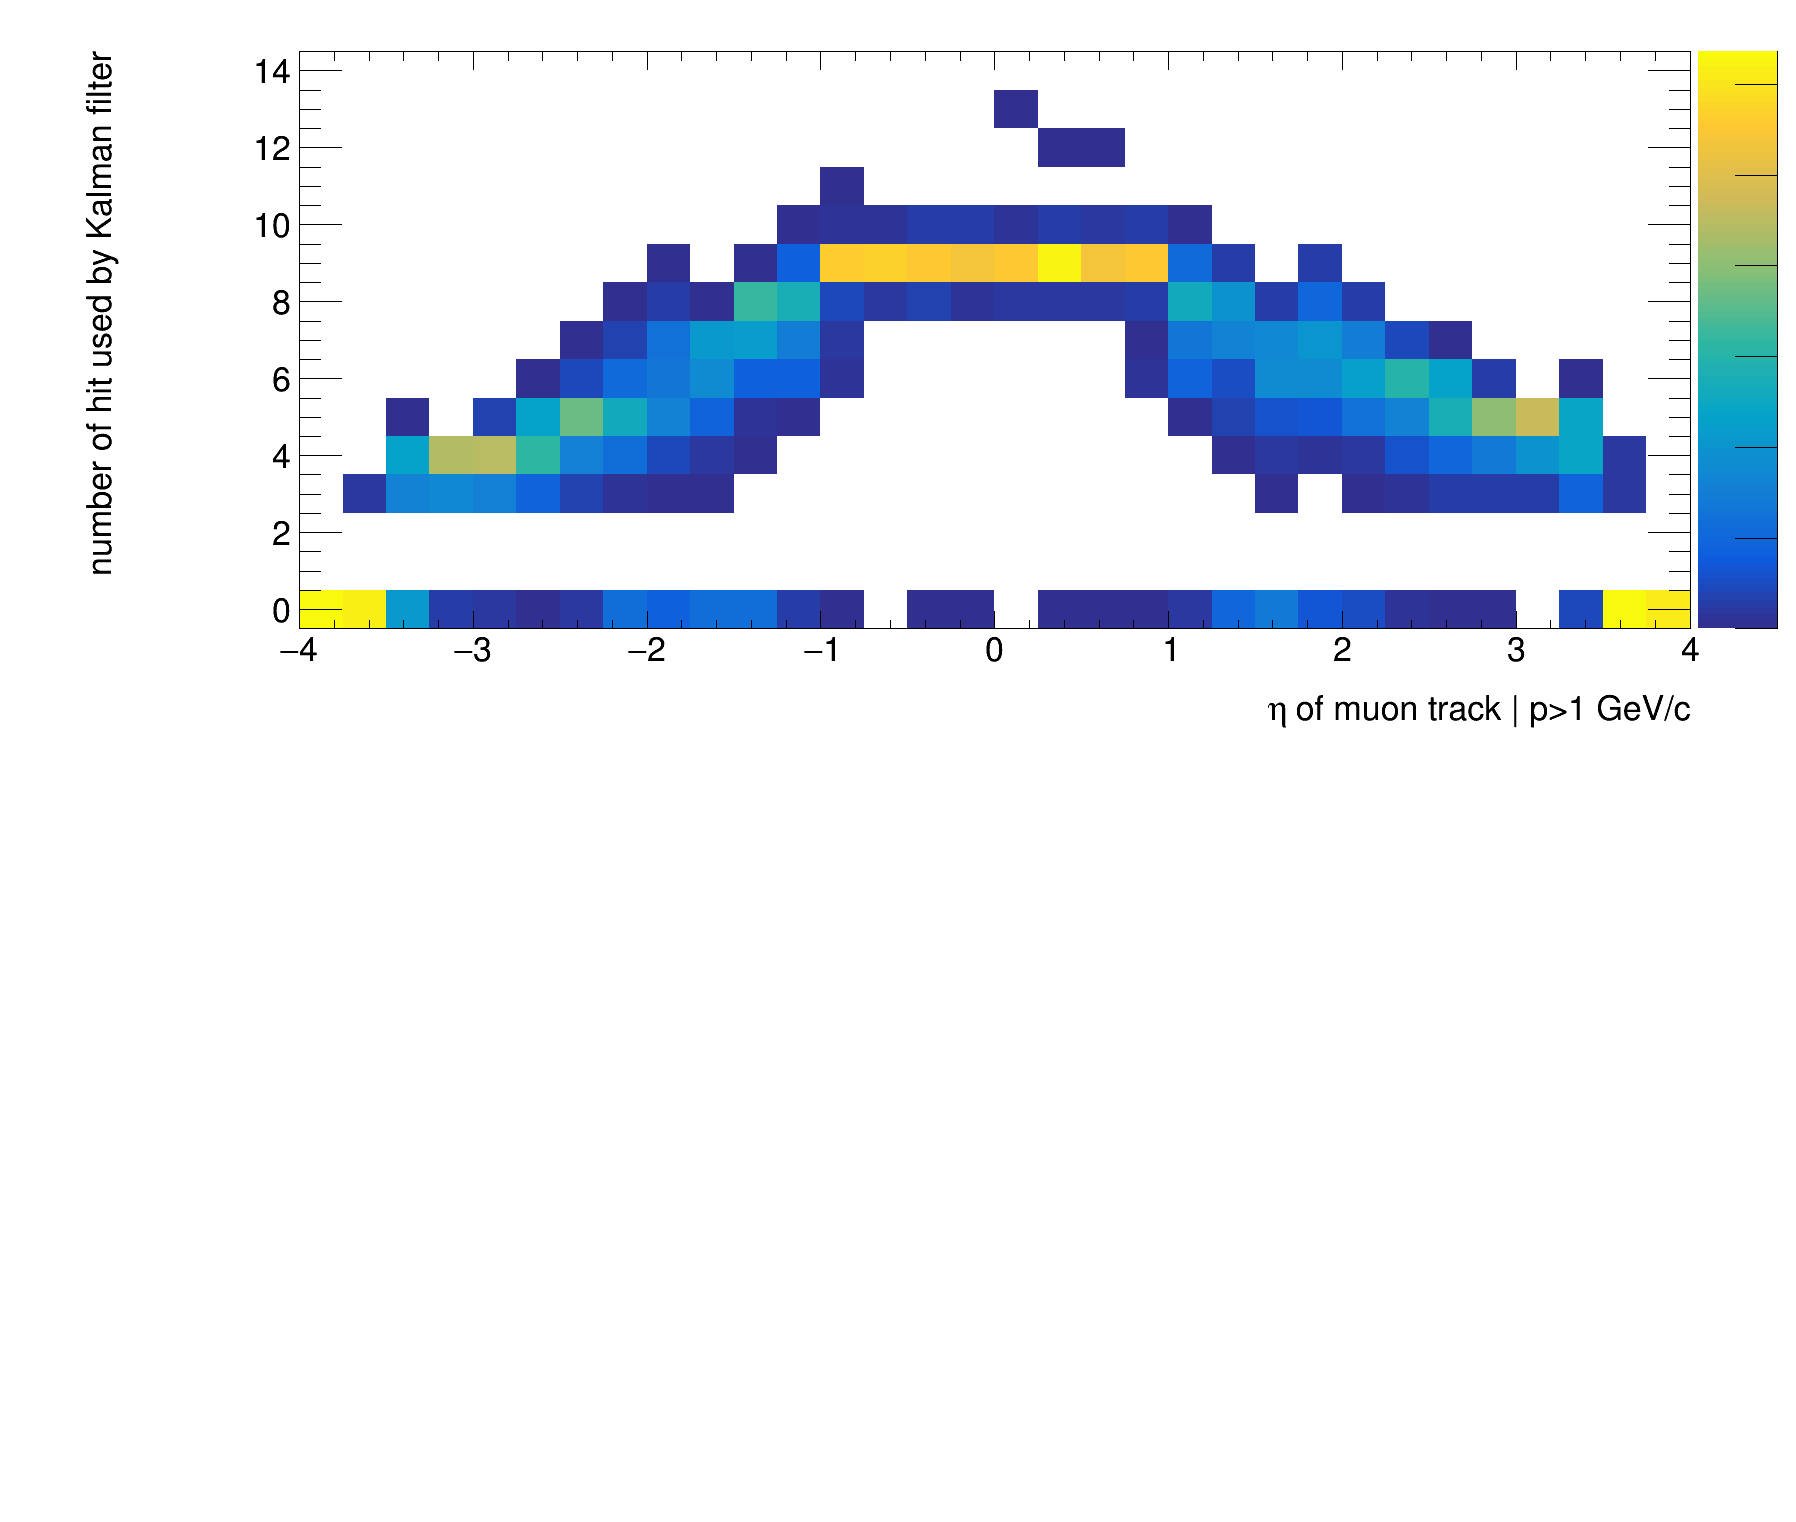

In [10]:
%%cpp

{

    
    const char *hist_name_prefix = "TowerScan";
    auto c1 = new TCanvas(TString("TowerScan") ,
                        TString("TowerScan"),
                        1800, 1550);

    c1->Divide(1, 2);
    int idx = 1;
    TPad *p;
    
    {
        p = (TPad *) c1->cd(idx++);
        c1->Update();
        
        TH1 * hnHit_eta = new TH2F("hnHit_eta",";#eta of muon track | p>1 GeV/c;number of hit used by Kalman filter", 32, -4,4, 15,-.5,14.5);
        
        tracks->Draw(" nHit_G4HIT_BARR_0 +  nHit_G4HIT_BARR_1+ nHit_G4HIT_CTTL_0 + nHit_G4HIT_EST_0 + nHit_G4HIT_EST_1 +  nHit_G4HIT_EST_2+ nHit_G4HIT_EST_3 +  nHit_G4HIT_ETTL_0 +  nHit_G4HIT_FST_0 + nHit_G4HIT_FST_1 + nHit_G4HIT_FST_2 + nHit_G4HIT_FST_3+ nHit_G4HIT_FST_4 + nHit_G4HIT_FTTL_0 +  nHit_G4HIT_RWELL_0 +  nHit_G4HIT_RWELL_1 +  nHit_G4HIT_RWELL_2 +  nHit_G4HIT_SVTX_0 +  nHit_G4HIT_SVTX_1  +  nHit_G4HIT_SVTX_2: -log( tan( 0.5* atan2( sqrt( gpx*gpx + gpy*gpy)  , gpz  ) ) )>>hnHit_eta","","colz");
        
    }
    
    
    
    
    c1->Draw();
}